---
**License**

 VacuumStudyAdiabatic

 Mon Jun 01 09:20:00 2020
 Copyright  2020
 Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 VacuumStudyAdiabatic
 Copyright (C) 2020 Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

In [1]:
import sys
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

from IPython.display import HTML

from numcosmo_py import Ncm, Nc
from numcosmo_py.plotting.tools import set_rc_params_article, latex_float

%matplotlib inline

# Figure utilities

In [2]:
set_rc_params_article(ncol=2)

# Initializing the library

In [3]:
__name__ = "NcContext"

Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())

# Complex structure quantization object

Below we define our object as a child of the complex structure quantization object Ncm.CSQ1D

In [4]:
csq1d = Nc.DECont(Omegaw=1.0, OmegaL=0.0, w=1.0e-6, cs2=1.0e-6)
state0 = Ncm.CSQ1DState.new()
state = Ncm.CSQ1DState.new()

ti = 1.0e-10
tf = 5.0e-2

ki = 1.0e0
kf = 1.0e2
k_a = np.geomspace(ki, kf, 1000)

csq1d.set_k(kf)

Found, tAD = csq1d.find_adiab_time_limit(None, ti, tf, 1.0e-5)

csq1d.compute_adiab(None, tAD, state0)

Found, tfAD = csq1d.find_adiab_time_limit(None, ti, 1.0e1, 1.0e-1)
if Found:
    tf = tfAD

print(ti, tAD, tf, Found)

mylw = 1.0

r_a = np.linspace(0.0, 0.05, 5)
theta_a = np.linspace(0.0, 2.0 * math.pi, 2, endpoint=False)

colors = cm.copper(np.linspace(0, 1, len(r_a)))

1e-10 5.059809893104709e-05 0.005059717873089227 True


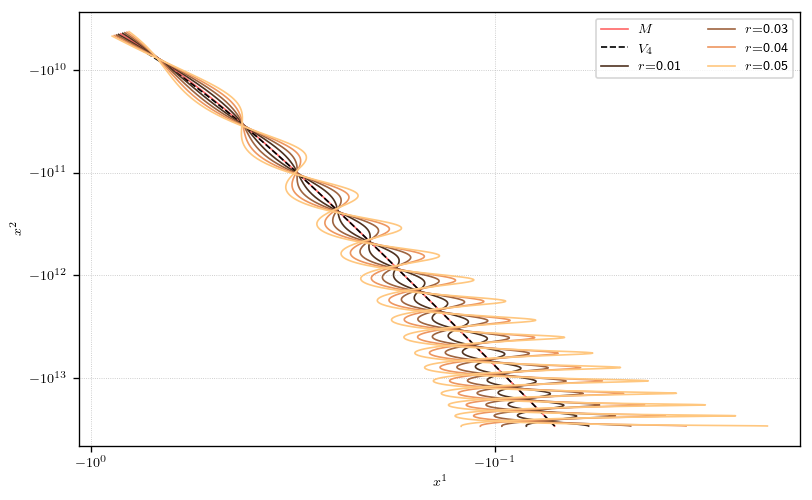

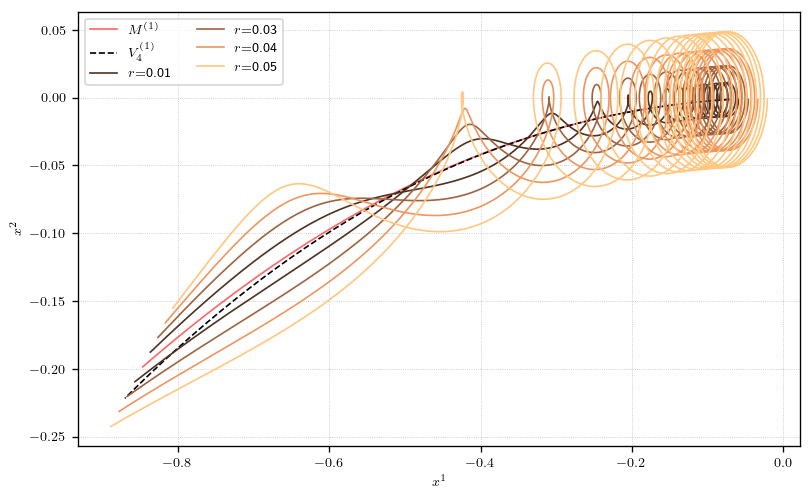

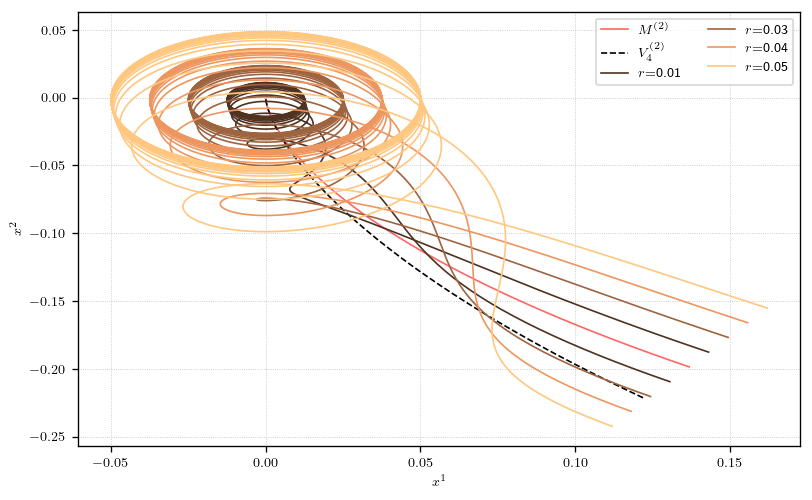

In [5]:
fig = plt.figure(dpi=120)

frame = Ncm.CSQ1DFrame.ORIG

for r, c in zip(r_a, colors):
    for theta in theta_a:
        if r == 0 and theta > 0.0:
            continue

        state0_circle = state0.get_circle(r, theta)
        csq1d.set_init_cond(None, Ncm.CSQ1DEvolState.ADIABATIC, state0_circle)
        csq1d.set_tf(tf)
        csq1d.prepare()

        t_a, tmax = csq1d.get_time_array()
        mx1x2 = np.array([csq1d.eval_at_frame(None, frame, t, state).get_minkowski() for t in t_a])

        if r == 0.0:
            plt.plot(
                mx1x2[:, 0], mx1x2[:, 1], lw=mylw, color="r", alpha=0.6, label=r"$M$"
            )

            Vx1x2 = np.array(
                [
                    csq1d.compute_adiab_frame(None, frame, t, state)[0].get_minkowski()
                    for t in t_a
                ]
            )

            plt.plot(
                Vx1x2[:, 0], Vx1x2[:, 1], "k--", lw=mylw, alpha=1.0, label=r"$V_4$"
            )

        elif theta == 0.0:
            plt.plot(
                mx1x2[:, 0], mx1x2[:, 1], lw=mylw, color=c, label=r"$r$=%.2f" % (r)
            )
        else:
            plt.plot(mx1x2[:, 0], mx1x2[:, 1], lw=mylw, color=c)


plt.grid(which="both", linestyle=":", color="0.75", linewidth=0.5)
leg = plt.legend(loc="best", ncol=2)

plt.xscale("symlog", linthresh=1.0e-15)
plt.yscale("symlog", linthresh=1.0e-10)

plt.xlabel("$x^1$")
plt.ylabel("$x^2$")

fig.tight_layout()
plt.savefig("adiab_vacuum_f0.pdf")
plt.show()

fig = plt.figure(dpi=120)

frame = Ncm.CSQ1DFrame.ADIAB1

for r, c in zip(r_a, colors):
    for theta in theta_a:
        if r == 0.0 and theta > 0.0:
            continue

        state0_circle = state0.get_circle(r, theta)
        csq1d.set_init_cond(None, Ncm.CSQ1DEvolState.ADIABATIC, state0_circle)
        csq1d.set_tf(tf)
        csq1d.prepare()

        t_a, tmax = csq1d.get_time_array()
        mx1x2 = np.array([csq1d.eval_at_frame(None, frame, t, state).get_minkowski() for t in t_a])

        if r == 0.0:
            plt.plot(
                mx1x2[:, 0],
                mx1x2[:, 1],
                lw=mylw,
                color="r",
                alpha=0.6,
                label=r"$M^{(1)}$",
            )

            Vx1x2 = np.array(
                [
                    csq1d.compute_adiab_frame(None, frame, t, state)[0].get_minkowski()
                    for t in t_a
                ]
            )

            plt.plot(
                Vx1x2[:, 0],
                Vx1x2[:, 1],
                "k--",
                lw=mylw,
                alpha=1.0,
                label=r"$V_4^{(1)}$",
            )
        elif theta == 0.0:
            plt.plot(
                mx1x2[:, 0], mx1x2[:, 1], lw=mylw, color=c, label=r"$r$=%.2f" % (r)
            )
        else:
            plt.plot(mx1x2[:, 0], mx1x2[:, 1], lw=mylw, color=c)


plt.grid(which="both", linestyle=":", color="0.75", linewidth=0.5)
leg = plt.legend(loc="best", ncol=2)

plt.xlabel("$x^1$")
plt.ylabel("$x^2$")

fig.tight_layout()
plt.savefig("adiab_vacuum_f1.pdf")
plt.show()

fig = plt.figure(dpi=120)

frame = Ncm.CSQ1DFrame.ADIAB2

for r, c in zip(r_a, colors):
    for theta in theta_a:
        if r == 0 and theta > 0.0:
            continue

        state0_circle = state0.get_circle(r, theta)
        csq1d.set_init_cond(None, Ncm.CSQ1DEvolState.ADIABATIC, state0_circle)
        csq1d.set_tf(tf)
        csq1d.prepare()

        t_a, tmax = csq1d.get_time_array()
        mx1x2 = np.array([csq1d.eval_at_frame(None, frame, t, state).get_minkowski() for t in t_a])

        if r == 0.0:
            plt.plot(
                mx1x2[:, 0],
                mx1x2[:, 1],
                lw=mylw,
                color="r",
                alpha=0.6,
                label=r"$M^{(2)}$",
            )

            Vx1x2 = np.array(
                [
                    csq1d.compute_adiab_frame(None, frame, t, state)[0].get_minkowski()
                    for t in t_a
                ]
            )

            plt.plot(
                Vx1x2[:, 0],
                Vx1x2[:, 1],
                "k--",
                lw=mylw,
                alpha=1.0,
                label=r"$V^{(2)}_4$",
            )

        elif theta == 0.0:
            plt.plot(
                mx1x2[:, 0], mx1x2[:, 1], lw=mylw, color=c, label=r"$r$=%.2f" % (r)
            )
        else:
            plt.plot(mx1x2[:, 0], mx1x2[:, 1], lw=mylw, color=c)

plt.grid(which="both", linestyle=":", color="0.75", linewidth=0.5)
leg = plt.legend(loc="best", ncol=2)

plt.xlabel("$x^1$")
plt.ylabel("$x^2$")

fig.tight_layout()
plt.savefig("adiab_vacuum_f2.pdf")
plt.show()

In [8]:
csq1d.set_reltol(1.0e-11)

def compute_J(k):
    csq1d.set_k(k)
    Found, tAD = csq1d.find_adiab_time_limit(None, ti, tf, 1.0e-6)
    csq1d.set_init_cond_adiab(None, tAD)
    csq1d.set_tf(1.0e10)
    csq1d.prepare()

    t_a, t_s = csq1d.get_time_array()

    J = csq1d.eval_at(None, t_a[-1], state).get_J()

    return J

In [9]:
J_a = []
k_a = np.geomspace(1.0e0, 1.0e2, 1000)
for k in k_a:
    J_a.append(np.array(list(compute_J(k))))

J_a = np.array(J_a)

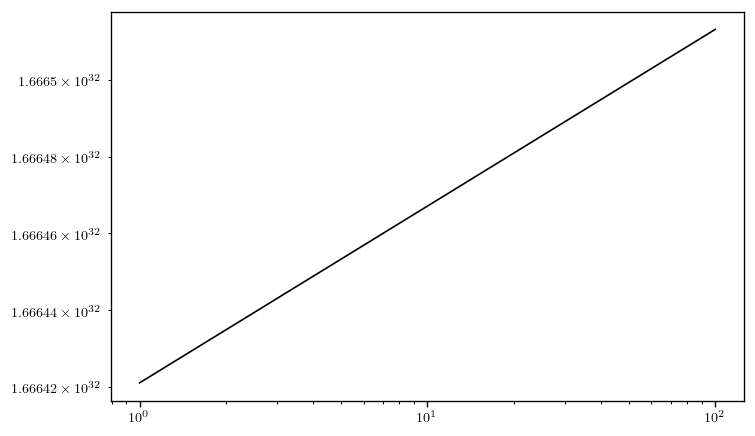

In [10]:
fig = plt.figure(dpi=120)

plt.plot(k_a, (k_a**3) * J_a[:, 0], lw=mylw, c="k", label=r"$J_{00}$")

plt.xscale("log")
plt.yscale("log")

74.19340120546806 1.1999576595952296e-05


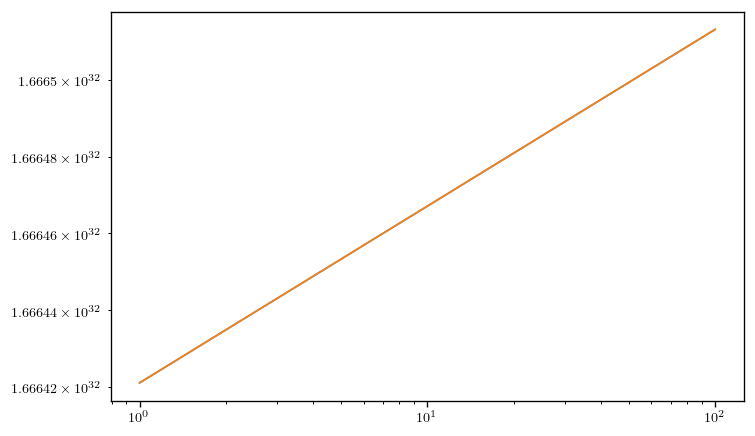

In [11]:
NPfit = 50
a, b = np.polyfit(np.log(k_a[:NPfit]), np.log((k_a[:NPfit] ** 3) * J_a[:NPfit, 0]), 1)
print(b, a)

fig = plt.figure(dpi=120)

plt.plot(k_a, (k_a**3) * J_a[:, 0], lw=mylw, label=r"$J_{00}$")
plt.plot(k_a, np.exp(b + a * np.log(k_a)), lw=mylw, label=r"$J_{00}$")

plt.xscale("log")
plt.yscale("log")